In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/facial-keypoints-detection/training.zip
/kaggle/input/facial-keypoints-detection/SampleSubmission.csv
/kaggle/input/facial-keypoints-detection/IdLookupTable.csv
/kaggle/input/facial-keypoints-detection/test.zip


In [2]:
#imports
import matplotlib.pyplot as plt
import keras

In [3]:
train_df=pd.read_csv('/kaggle/input/facial-keypoints-detection/training.zip')

In [4]:
train_df.head()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,238 236 237 238 240 240 239 241 241 243 240 23...
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170,219 215 204 196 204 211 212 200 180 168 178 19...
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368,144 142 159 180 188 188 184 180 167 132 84 59 ...
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,...,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383,193 192 193 194 194 194 193 192 168 111 50 12 ...
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,...,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166,147 148 160 196 215 214 216 217 219 220 206 18...


In [5]:
#train_df.columns
train_df.fillna(method='ffill',inplace=True)


In [6]:
train_df.columns

Index(['left_eye_center_x', 'left_eye_center_y', 'right_eye_center_x',
       'right_eye_center_y', 'left_eye_inner_corner_x',
       'left_eye_inner_corner_y', 'left_eye_outer_corner_x',
       'left_eye_outer_corner_y', 'right_eye_inner_corner_x',
       'right_eye_inner_corner_y', 'right_eye_outer_corner_x',
       'right_eye_outer_corner_y', 'left_eyebrow_inner_end_x',
       'left_eyebrow_inner_end_y', 'left_eyebrow_outer_end_x',
       'left_eyebrow_outer_end_y', 'right_eyebrow_inner_end_x',
       'right_eyebrow_inner_end_y', 'right_eyebrow_outer_end_x',
       'right_eyebrow_outer_end_y', 'nose_tip_x', 'nose_tip_y',
       'mouth_left_corner_x', 'mouth_left_corner_y', 'mouth_right_corner_x',
       'mouth_right_corner_y', 'mouth_center_top_lip_x',
       'mouth_center_top_lip_y', 'mouth_center_bottom_lip_x',
       'mouth_center_bottom_lip_y', 'Image'],
      dtype='object')

In [7]:
image_df=train_df['Image']
imageArr=[]
for i in image_df:
     img = i.split()
     img = ['0' if x == '' else x for x in img]
     imageArr.append(img)
x_train = np.array(imageArr,dtype='float')
x_train = x_train.reshape(-1,96,96,1)
print(x_train.shape)

(7049, 96, 96, 1)


In [8]:
keypoints=train_df.drop('Image',axis=1)
y_train=np.array(keypoints,dtype='float')
print(y_train.shape)


(7049, 30)


In [9]:
y_train[0][29]

84.4857744361

In [10]:
def visualize_with_no_keypoints(index):
    plt.imshow(x_train[index].reshape(96,96),cmap='gray')

def visualize_with_keypoints(index):
    plt.imshow(x_train[index].reshape(96,96),cmap='gray')
    for i in range(0,28,2):
        plt.plot(y_train[index][i],y_train[index][i+1],'ro')


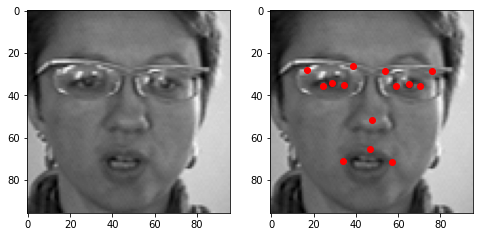

In [11]:
fig=plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
visualize_with_no_keypoints(10)
plt.subplot(1,2,2)
visualize_with_keypoints(10)

In [12]:
from keras.models import Sequential,Model
from keras.layers import Activation,Convolution2D,MaxPooling2D,BatchNormalization,Dense,Dropout,Flatten
from keras.layers.advanced_activations import LeakyReLU

In [13]:
model=Sequential()
model.add(Convolution2D(32,(3,3),input_shape=(96,96,1),padding='same',use_bias=False))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())


2022-08-19 07:04:36.787158: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-19 07:04:36.894385: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-19 07:04:36.895148: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-19 07:04:36.897304: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [14]:
model.add(Convolution2D(32,(3,3),padding='same',use_bias=False,input_shape=(96,96,1)))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

In [15]:
model.add(Convolution2D(64,(3,3),padding='same',use_bias=False,input_shape=(96,96,1)))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())

In [16]:
model.add(Convolution2D(64,(3,3),padding='same',use_bias=False,input_shape=(96,96,1)))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

In [17]:
model.add(Convolution2D(96,(3,3),padding='same',use_bias=False,input_shape=(96,96,1)))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())

In [18]:
model.add(Convolution2D(96,(3,3),padding='same',use_bias=False,input_shape=(96,96,1)))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

In [19]:
model.add(Convolution2D(128,(3,3),padding='same',use_bias=False,input_shape=(96,96,1)))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(Convolution2D(128,(3,3),padding='same',use_bias=False,input_shape=(96,96,1)))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

In [20]:
model.add(Convolution2D(256,(3,3),padding='same',use_bias=False,input_shape=(96,96,1)))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(Convolution2D(256,(3,3),padding='same',use_bias=False,input_shape=(96,96,1)))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

In [21]:
model.add(Convolution2D(512,(3,3),padding='same',use_bias=False,input_shape=(96,96,1)))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(Convolution2D(512,(3,3),padding='same',use_bias=False,input_shape=(96,96,1)))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

In [22]:
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(30))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 96, 96, 32)        288       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 96, 96, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 96, 96, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 96, 96, 32)        9216      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 96, 96, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 96, 96, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 48, 48, 32)        0

In [23]:
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['mae','acc'])
# xtrain is np array 7049x96x96x1 ytrain is 7049x30 np array

In [24]:
model.fit(x_train,y_train,batch_size=256,epochs=45,
          validation_split=0.2)

2022-08-19 07:04:40.727820: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/45


2022-08-19 07:04:42.771573: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


23/23 [==============================] - 13s 165ms/step - loss: 621.4550 - mae: 18.2397 - acc: 0.4699 - val_loss: 687.1409 - val_mae: 24.6391 - val_acc: 0.3121
Epoch 2/45
23/23 [==============================] - 3s 127ms/step - loss: 33.1282 - mae: 4.4577 - acc: 0.4235 - val_loss: 24.5070 - val_mae: 3.6639 - val_acc: 0.6872
Epoch 3/45
23/23 [==============================] - 3s 127ms/step - loss: 23.2907 - mae: 3.7053 - acc: 0.3967 - val_loss: 15.0240 - val_mae: 2.8460 - val_acc: 0.6872
Epoch 4/45
23/23 [==============================] - 3s 126ms/step - loss: 21.5182 - mae: 3.5524 - acc: 0.4240 - val_loss: 8.1359 - val_mae: 1.9666 - val_acc: 0.6872
Epoch 5/45
23/23 [==============================] - 3s 127ms/step - loss: 20.7847 - mae: 3.4897 - acc: 0.4366 - val_loss: 7.3944 - val_mae: 1.7860 - val_acc: 0.6872
Epoch 6/45
23/23 [==============================] - 3s 127ms/step - loss: 19.8859 - mae: 3.3995 - acc: 0.4362 - val_loss: 9.3399 - val_mae: 2.1645 - val_acc: 0.6872
Epoch 7/45
23

test_df=pd.read_csv('/kaggle/input/facial-keypoints-detection/test.zip')
image_df=test_df['Image']
imageArr=[]
for i in image_df:
     img = i.split()
     img = ['0' if x == '' else x for x in img]
     imageArr.append(img)
x_test = np.array(imageArr,dtype='float')
x_test = x_test.reshape(-1,96,96,1)
print(x_test.shape)

In [25]:
test_df.head()

NameError: name 'test_df' is not defined

In [ ]:
predict=model.predict(x_test)

In [ ]:
predict[0][0]

In [ ]:
idLookupTable=pd.read_csv('/kaggle/input/facial-keypoints-detection/IdLookupTable.csv')

In [ ]:
predict.shape
submission=pd.read_csv('/kaggle/input/facial-keypoints-detection/SampleSubmission.csv')

In [ ]:


for i in range(904):
    submission['Location'][30*i:30*(i+1)]=predict[i]

submission['Location'][30*904:30*904+4]=predict[905][0:4]

In [ ]:

submission.tail()

In [ ]:
submission.to_csv('/kaggle/working/Submission.csv')